# Reference Manager Citation Errors

12-18-23 KV
2-20-23 KV


In [2]:
# Import needed packages

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
# Read data from where it's entered into CSV

filepath = '/Users/kvrouwenvelder/Library/CloudStorage/OneDrive-AmericanGeophysicalUnion/Documents/Data/Reference-Manager-Work/reference-manager-analysis/'
filename = 'reference-manager-data-v2-'
reference_manager_filenames = ['BibTeX','repo-recommended-citation','Zotero-plugin','Zotero-wizard','BibDesk','Sciwheel-plugin',
                               'SciWheel-wizard','CrossCite','Endnote','Papers-plugin','Papers-wizard','Paperpile-plugin',
                               'Paperpile-wizard','Mendeley-plugin','Mendeley-wizard','RefWorks','Export-options']

# import files
bibtex = pd.read_csv(filepath+filename+reference_manager_filenames[0]+'.csv')
repo_recommended_citation = pd.read_csv(filepath+filename+reference_manager_filenames[1]+'.csv')
zotero_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[2]+'.csv')
zotero_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[3]+'.csv')
bib_desk = pd.read_csv(filepath+filename+reference_manager_filenames[4]+'.csv')
sciwheel_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[5]+'.csv')
sciwheel_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[6]+'.csv')
crosscite = pd.read_csv(filepath+filename+reference_manager_filenames[7]+'.csv')
endnote = pd.read_csv(filepath+filename+reference_manager_filenames[8]+'.csv')
papers_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[9]+'.csv')
papers_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[10]+'.csv')
paperpile_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[11]+'.csv')
paperpile_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[12]+'.csv')
mendeley_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[13]+'.csv')
mendeley_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[14]+'.csv')
refworks = pd.read_csv(filepath+filename+reference_manager_filenames[15]+'.csv')
export_options = pd.read_csv(filepath+filename+reference_manager_filenames[16]+'.csv')

list_of_ref_managers = [bibtex,repo_recommended_citation,zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin,
                       sciwheel_wizard,crosscite, endnote, papers_plugin,papers_wizard,paperpile_plugin,
                       paperpile_wizard,mendeley_plugin,mendeley_wizard,refworks]


# Functions

In [4]:
# Set up input fields

# Define export metadata fields for count_fields

ex_cols = ['export-meta-type', 'export-meta-authors','export-meta-title','export-meta-date','export-meta-DOI',
            'export-meta-repo','export-meta-version','export-meta-access-date']

# Define import metadata fields for count_fields
im_cols = ['import-meta-type', 'import-meta-authors','import-meta-title','import-meta-date','import-meta-DOI',
            'import-meta-repo','import-meta-version','import-meta-access-date']


In [5]:
# Count correct, missing, incorrect metadata fields for each repository and reference manager (add cols to df)

def count_fields(input_df,cols,col_type):
    input_df['count_incorrect_'+col_type]=input_df[cols].sum(axis=1) # add a column to df with count "incorrect"
    input_df['count_missing_'+col_type]= input_df[cols].isna().sum(axis=1) # add a column to df with count 'missing'
    # The count correct is len(cols) - (# incorrect + # missing)
    input_df['count_correct_'+col_type] = len(cols) - (input_df['count_incorrect_'+col_type]+input_df['count_missing_'+col_type])
    return input_df


In [6]:
# Count correct, missing, incorrect across all REFERENCE MANAGERS

def sum_across_repos(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums
    one_sum = np.zeros(3)
    full_sums = np.tile(one_sum, (len(list_of_dfs), 1))
    for i in range(len(full_sums)):
        full_sums[i] = np.zeros(3)
    

    iter = 0 #start counter
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type)
        sum_incorrect = np.sum(df['count_incorrect_' + col_type]) # this will be the first list element in return
        sum_missing = np.sum(df['count_missing_' + col_type]) # This will be the second list element in return
        sum_correct = np.sum(df['count_correct_' + col_type]) #this will be the 3rd list element in return
        sums = [sum_incorrect, sum_missing, sum_correct]
        full_sums[iter] = sums
        iter += 1
    
    return full_sums
    
# print(full_sums[0][1]) # access an individual element in this list using list[rows][columns]


In [38]:
# Count correct, missing, incorrect across all REPOSITORIES

def sum_across_refmans(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums df
    # Number of rows will = # repos in this list
    data = {str('count_incorrect_'+col_type): np.zeros(len(repo_recommended_citation['Repository'])), #init w zeros
        str('count_missing_'+col_type): np.zeros(len(repo_recommended_citation['Repository'])),
        str('count_correct_'+col_type): np.zeros(len(repo_recommended_citation['Repository']))}


    full_sums_df = pd.DataFrame(data) # make empty df 
    full_sums_df['Repository'] = repo_recommended_citation['Repository'] # Add repository column
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type) #returns that dataframe with the 3 sums added
        
        #add sum of each new column to existing dataframe
        full_sums_df['count_incorrect_'+col_type] += df['count_incorrect_'+col_type]
        full_sums_df['count_missing_'+col_type] += df['count_missing_'+col_type]
        full_sums_df['count_correct_'+col_type] += df['count_correct_'+col_type]
    
    return full_sums_df
    

# Repository recommended citation
* How many repositories offer a recommended citation? 
* How many repositories offer a recommended citation that is correct when compared to DataCite metadata?
* How many repositories define a citation style? 
* How many repositories offer an opportunity to change the citation style to what journal requires?

3 repositories specify a citation style (APA).


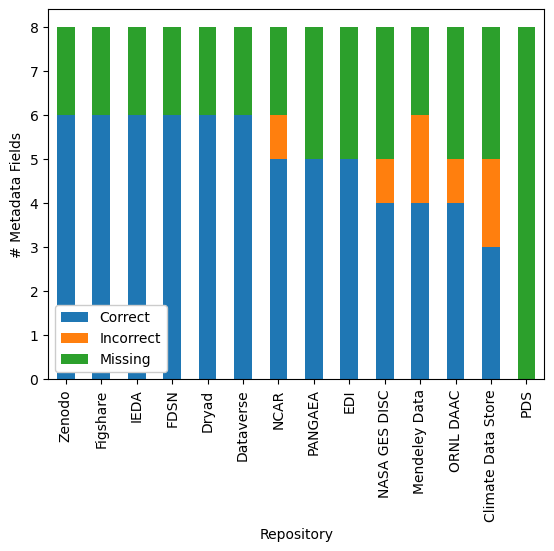

In [7]:
# Count the correct , incorrect, missing fields - Export Only
count_fields(repo_recommended_citation, ex_cols,'ex')

# How many repositories specify citation style?

num_repo_citation_style = len(repo_recommended_citation[repo_recommended_citation['Citation-style']=='APA'])
print(str(num_repo_citation_style)+' repositories specify a citation style (APA).')

# Create a stacked bar graph with correct, incorrect, missing fields for each repository

## Sort df by most correct fields

## Start graphing
ax = repo_recommended_citation.sort_values(by=['count_correct_ex'],ascending = False).plot.bar(x = 'Repository', y = ['count_correct_ex','count_incorrect_ex','count_missing_ex'], stacked = True, label = ['Correct', 'Incorrect', 'Missing'])
plt.ylabel('# Metadata Fields')
ax.legend(loc = 'lower left',framealpha=1)

# need to adjust colors, font sizes, rotation of x labels, graph shape, etc.

# Graph correct fields across all repositories
* For each reference manager, what are the # of correct fields across all repositories?

This can be done for either the import or export fields.


/var/folders/zl/xzgzfcgs1p7cgrbjxvk_mhg40000gp/T/ipykernel_97383/1083502132.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  input_df['count_incorrect_'+col_type]=input_df[cols].sum(axis=1) # add a column to df with count "incorrect"


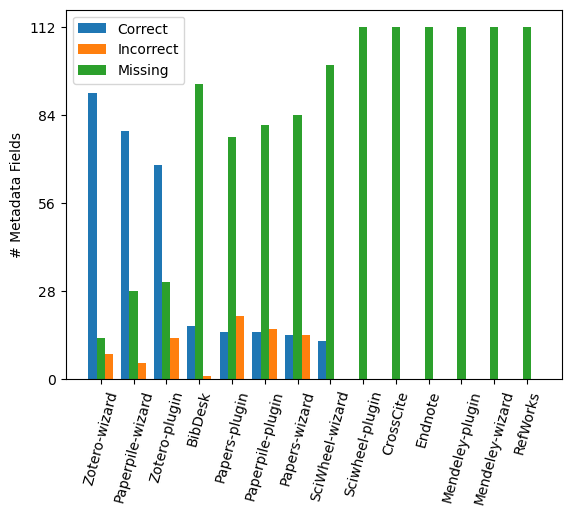

In [34]:
list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard,crosscite, 
               endnote, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks)

repo_import_sums = sum_across_repos(list_of_dfs, im_cols, 'im')

repo_import_sums_df = pd.DataFrame(data = repo_import_sums, index = reference_manager_filenames[2:-1], columns = ['sum_incorrect', 'sum_missing', 'sum_correct'])
repo_import_sums_df_sort = repo_import_sums_df.sort_values(by=['sum_correct'],ascending = False)

fig, ax = plt.subplots()
x = np.arange(14)
y = 112 # Max value possible for repo_export_sums for each ref manager
offset = 0.25
width = 0.25
ax.bar(x - offset, repo_import_sums_df_sort['sum_correct'], width = width, label = 'Correct')
ax.bar(x + offset, repo_import_sums_df_sort['sum_incorrect'], width = width, label = 'Incorrect')
ax.bar(x, repo_import_sums_df_sort['sum_missing'], width = width, label = 'Missing')

# set labels and ticks and axes
ax.set_xticks(x,repo_import_sums_df_sort.index, rotation = 75)
ax.set_yticks([0,y/4,y/2,3*y/4,y])
ax.set_ylabel('# Metadata Fields')
ax.legend()

# Bibtex
* How many repositories offer Bibtex exports and in what formats?
* Are Bibtex fields correct? 

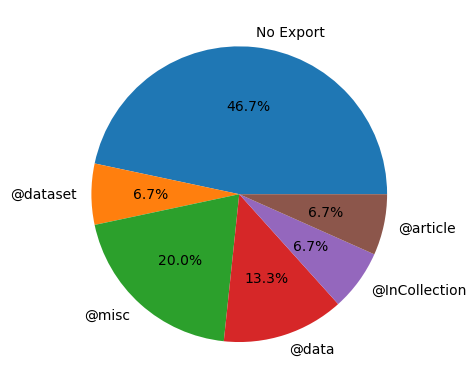

In [9]:
# First how many repos offer Bibtex exports

# Count whether there is a bibtex export or not

# no bibtex
sum_no_bibtex = np.sum(bibtex['export-exists'].isna())
sum_bibtex = len(bibtex['export-exists'])-sum_no_bibtex

# Filter by type
bibtex_na = bibtex[bibtex['export-exists'].isna()]
bibtex_dataset = bibtex[bibtex['export-file-type'].str.contains('dataset', na=False)]
bibtex_misc = bibtex[bibtex['export-file-type'].str.contains('misc', na=False)]
bibtex_data = bibtex[bibtex['export-file-type'].str.contains('data', na=False)]
bibtex_incoll = bibtex[bibtex['export-file-type'].str.contains('incollection', na=False)]
bibtex_article = bibtex[bibtex['export-file-type'].str.contains('article', na=False)]


# # bar chart for bibtex or NO
# fig, ax = plt.subplots()
# ax.bar([1,2], [sum_bibtex, sum_no_bibtex], label = 'Correct')

labels = ['No Export','@dataset','@misc','@data','@InCollection','@article']
sizes = [len(bibtex_na['export-exists']), len(bibtex_dataset['export-exists']),len(bibtex_misc['export-exists']),
         len(bibtex_data['export-exists']),len(bibtex_incoll['export-exists']),len(bibtex_article['export-exists'])]

# Plot pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()



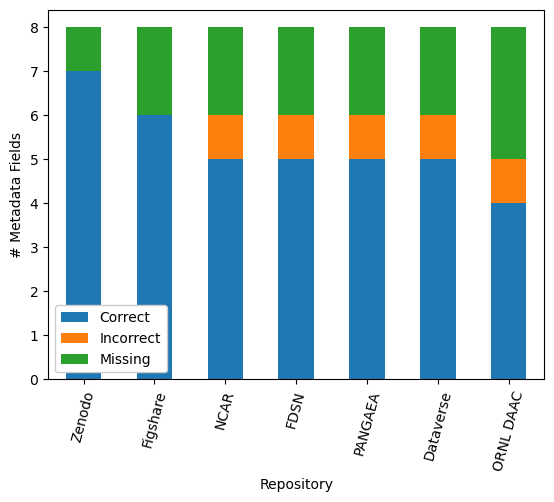

In [10]:
# Count the correct , incorrect, missing fields - Import Only
count_fields(bibtex, im_cols,'im')

# Filter by only repos offering bibtex export, sort, Graph
ax2 = bibtex.loc[bibtex['export-exists']==0.0].sort_values(by=['count_correct_im'],ascending = False).plot.bar(x = 'Repository', y = ['count_correct_im','count_incorrect_im','count_missing_im'], stacked = True, label = ['Correct', 'Incorrect','Missing'])
plt.ylabel('# Metadata Fields')
ax2.legend(loc = 'lower left',framealpha=1)
ax2.set_xticks(np.arange(7), labels = bibtex['Repository'].loc[bibtex['export-exists']==0],rotation=75)
plt.show()

# Best Repository Citation Metadata

* are there any repositories that are performing exceptionally well across reference managers?

Use import data and sum across sheets - how many '0s'. 


Could also break out the 8 metadata fields on a by-repository basis and count across the sheets for a single repository for each field, but this would be pretty challenging to graph

In [39]:
list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard,crosscite, 
               endnote, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks)

refman_import_sums = sum_across_refmans(list_of_dfs, im_cols, 'im')

print(refman_import_sums)

    count_incorrect_im  count_missing_im  count_correct_im          Repository
0                  4.0              71.0              37.0              Zenodo
1                  3.0              78.0              31.0            Figshare
2                 13.0              86.0              13.0                 PDS
3                  8.0              86.0              18.0                IEDA
4                  4.0              82.0              26.0                NCAR
5                  8.0              88.0              16.0       NASA GES DISC
6                  8.0              84.0              20.0                FDSN
7                  7.0              88.0              17.0       Mendeley Data
8                  4.0              82.0              26.0             PANGAEA
9                  3.0              87.0              22.0                 EDI
10                 3.0              85.0              24.0               Dryad
11                 2.0              87.0            

/var/folders/zl/xzgzfcgs1p7cgrbjxvk_mhg40000gp/T/ipykernel_97383/1083502132.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  input_df['count_incorrect_'+col_type]=input_df[cols].sum(axis=1) # add a column to df with count "incorrect"
